<a href="https://www.kaggle.com/code/khoatran311/tiktok-videos-and-scrutinies?scriptVersionId=192811402" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
#### The dataset used consist of information on videos which were reported by TikTok users for various reasons, with the videos expressing either a claim or opinion. The primary analysis focuses on understanding what characteristics are better for separating claim-related videos from opinion-related videos, and compared to each other, which kind of videos receive more scrutinies from TikTok's moderation. 

In [1]:
library(tidyverse)
library(data.table)
library(patchwork)

theme_custom <- theme_classic() +
                theme(## Axis labels
                      axis.text.x = element_text(size=18, family="Econ Sans Cnd light"),
                      axis.text.y = element_text(size=18, family="Econ Sans Cnd light"),
                      ## Title, subtitle, caption, legend
                      plot.title = element_text(size=22, face="bold", family="Econ Sans Cnd bold", 
                                                hjust = 0, vjust = 1, margin = margin(b = 10)),
                      plot.subtitle = element_text(size=18, family="Econ Sans Cnd regular",
                                                   hjust = 0),
                      plot.caption = element_text(size=12, face="bold", family="Econ Sans Cnd light", hjust=0, colour="#6F8793"),
                      legend.position = "top",
                      legend.text = element_text(size=15, hjust=0, vjust=.1),
                      legend.title = element_blank(),
                      ## y-axis lines
                      panel.grid.major.y = element_line(color="#6F8793"),
                      ## Background color
                      panel.background=element_rect(fill="#F3F0E0"),
                      plot.background=element_rect(fill="#F3F0E0"),
                      legend.background=element_rect(fill="#F3F0E0")
                     )

fig_size <- function(width=22, heigth=8){
    options(repr.plot.width=width, repr.plot.height=heigth)
}
fig_size()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘data.table’




The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year




The following objects are masked from ‘package:dplyr’:

    between, first, last




The following object is masked from ‘package:purrr’:

    transpose




In [2]:
data <- read_csv("/kaggle/input/dataset-from-tiktok/tiktok_dataset.csv")

head(data,5)
glimpse(data,2)
spec(data)

Rows: 19382 Columns: 12


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): claim_status, video_transcription_text, verified_status, author_ban...
dbl (3): #, video_id, video_duration_sec



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,claim,7017666017,59,someone shared with me that drone deliveries are already happening and will become common by 2025,not verified,under review,343296,19425,241,1,0
2,claim,4014381136,32,someone shared with me that there are more microorganisms in one teaspoon of soil than people on the planet,not verified,active,140877,77355,19034,1161,684
3,claim,9859838091,31,"someone shared with me that american industrialist andrew carnegie had a net worth of $475 million usd, worth over $300 billion usd today",not verified,active,902185,97690,2858,833,329
4,claim,1866847991,25,"someone shared with me that the metro of st. petersburg, with an average depth of hundred meters, is the deepest metro in the world",not verified,active,437506,239954,34812,1234,584
5,claim,7105231098,19,someone shared with me that the number of businesses allowing employees to bring pets to the workplace has grown by 6% worldwide,not verified,active,56167,34987,4110,547,152


Rows: 19,382
Columns: 12
$ `#`                      <dbl> …
$ claim_status             <chr> …
$ video_id                 <dbl> …
$ video_duration_sec       <dbl> …
$ video_transcription_text <chr> …
$ verified_status          <chr> …
$ author_ban_status        <chr> …
$ video_view_count         <chr> …
$ video_like_count         <chr> …
$ video_share_count        <chr> …
$ video_download_count     <chr> …
$ video_comment_count      <chr> …


cols(
  `#` = col_double(),
  claim_status = col_character(),
  video_id = col_double(),
  video_duration_sec = col_double(),
  video_transcription_text = col_character(),
  verified_status = col_character(),
  author_ban_status = col_character(),
  video_view_count = col_character(),
  video_like_count = col_character(),
  video_share_count = col_character(),
  video_download_count = col_character(),
  video_comment_count = col_character()
)

In [3]:
data <- 
    data %>%
    select(!"#")

data %>%
    is.na() %>%
    apply(2, sum) %>%
    data.frame() %>%
    rownames_to_column() %>%
    rename("feature"='rowname',
           "NA_count"=".") %>%
    arrange(desc(NA_count))

feature,NA_count
<chr>,<int>
claim_status,298
video_transcription_text,298
video_id,0
video_duration_sec,0
verified_status,0
author_ban_status,0
video_view_count,0
video_like_count,0
video_share_count,0


In [4]:
data %>%
    filter(is.na(claim_status))

claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,4380513697,39,NA,not verified,active,#N/A,#N/A,#N/A,#N/A,#N/A
NA,8352130892,60,NA,not verified,active,#N/A,#N/A,#N/A,#N/A,#N/A
NA,4443076562,25,NA,not verified,active,#N/A,#N/A,#N/A,#N/A,#N/A
NA,8328300333,7,NA,not verified,active,#N/A,#N/A,#N/A,#N/A,#N/A
NA,3968729520,8,NA,not verified,active,#N/A,#N/A,#N/A,#N/A,#N/A
NA,1294150914,16,NA,not verified,active,#N/A,#N/A,#N/A,#N/A,#N/A
NA,9656495988,41,NA,not verified,active,#N/A,#N/A,#N/A,#N/A,#N/A
NA,9315592484,7,NA,not verified,active,#N/A,#N/A,#N/A,#N/A,#N/A
NA,2697223671,43,NA,not verified,active,#N/A,#N/A,#N/A,#N/A,#N/A


In [5]:
data <- 
    data %>%
    filter(!is.na(claim_status))

### Convert from char -> num type
num_cols <- c('video_view_count','video_like_count','video_share_count',
              'video_download_count','video_comment_count')

for(feature in num_cols){
    data[[feature]] <- as.numeric(data[[feature]])
}

In [6]:
data %>%
    is.na() %>%
    apply(2, sum) %>%
    data.frame() %>%
    rownames_to_column() %>%
    rename("feature"='rowname',
           "NA_count"=".") %>%
    arrange(desc(NA_count))

feature,NA_count
<chr>,<int>
claim_status,0
video_id,0
video_duration_sec,0
video_transcription_text,0
verified_status,0
author_ban_status,0
video_view_count,0
video_like_count,0
video_share_count,0


In [7]:
duplicate_check1 <- nrow(data) - length(data$video_id) 

duplicate_check2 <-
    data %>%
    select(!video_id) %>%
    duplicated() %>%
    sum()

print(duplicate_check1, quote=FALSE)
print(duplicate_check1, quote=FALSE)

[1] 0


[1] 0


# Data Exploration

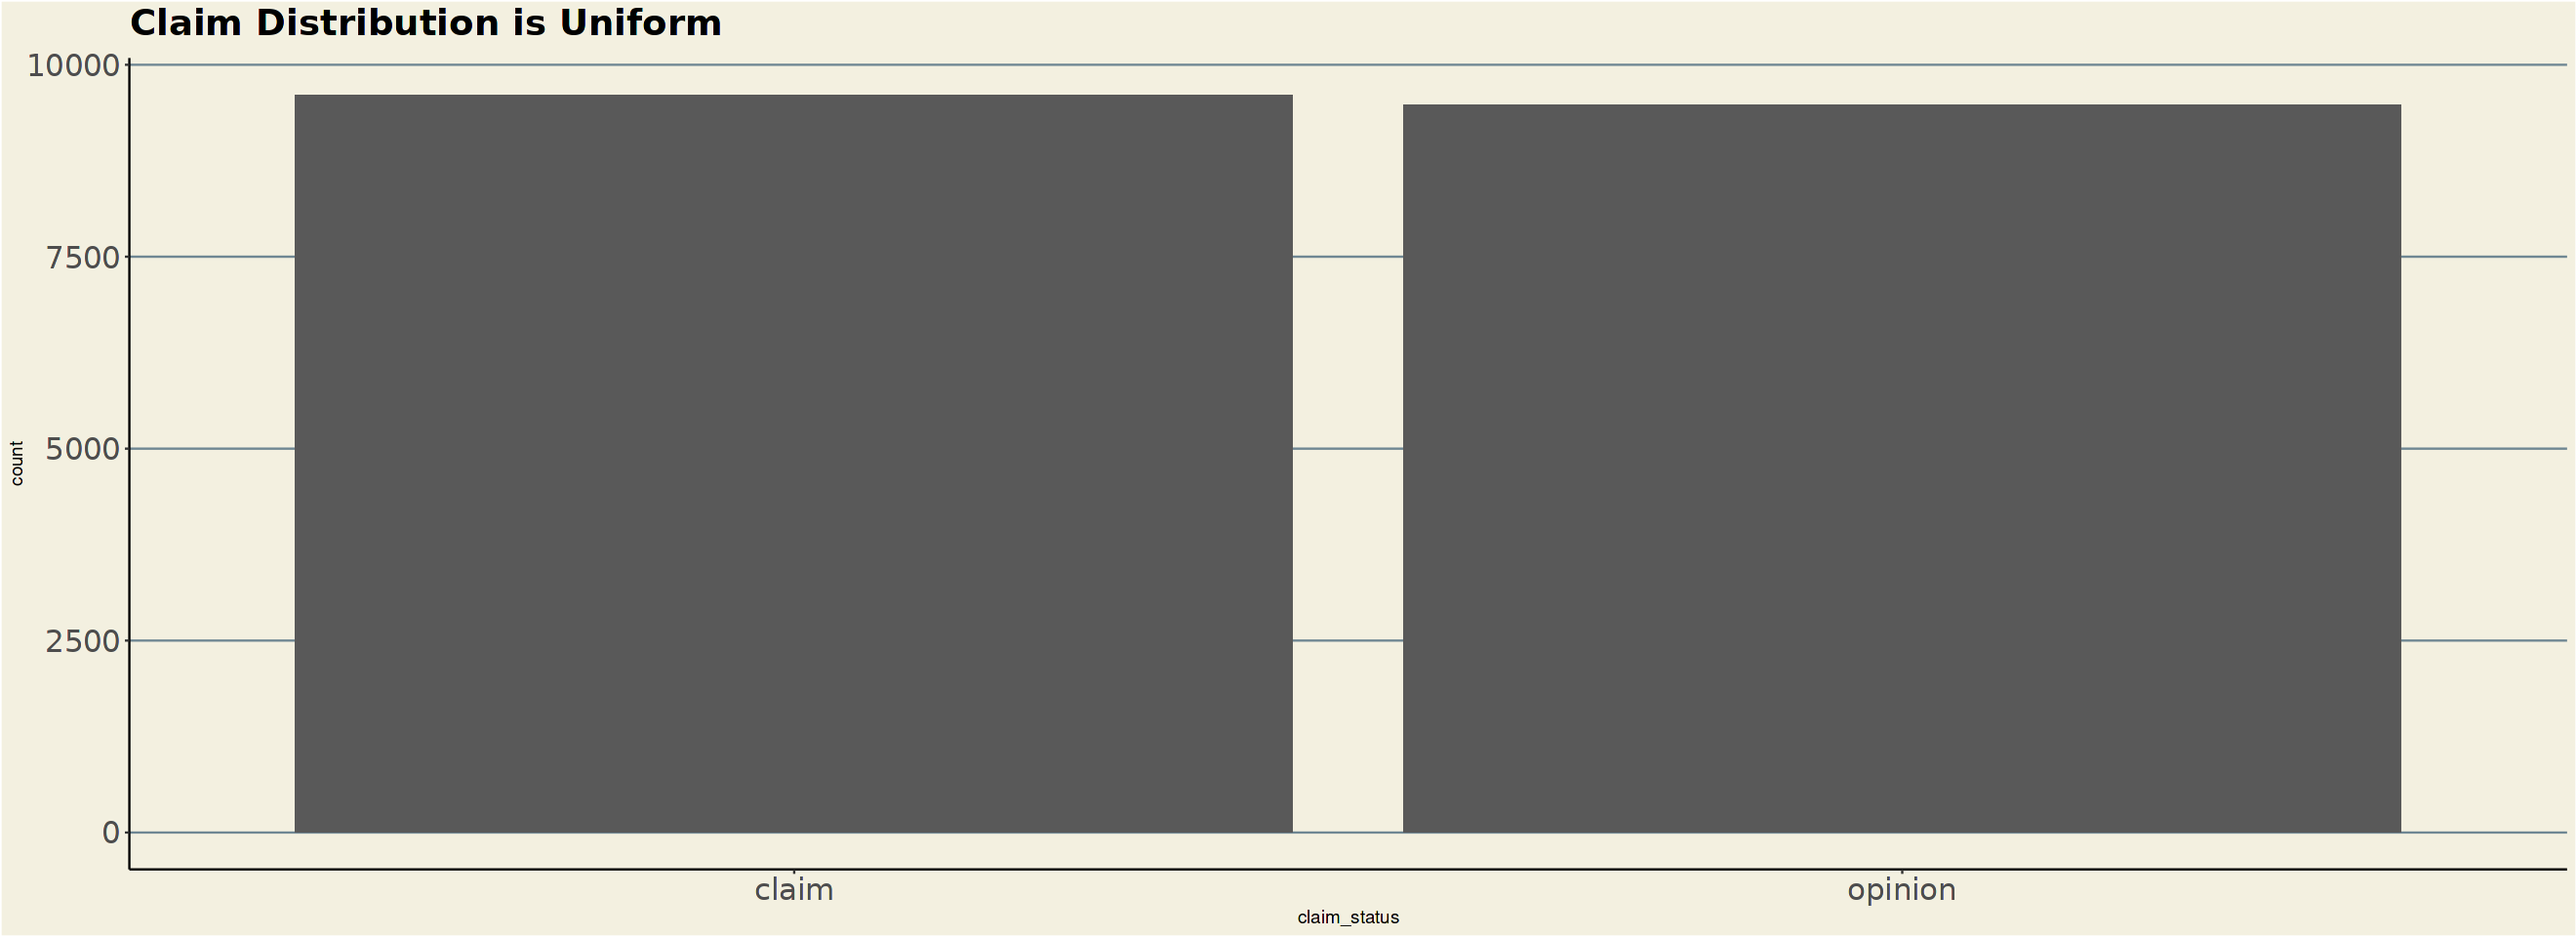

In [8]:
data %>%
    ggplot(aes(x=claim_status)) +
    geom_bar() +
    theme_custom +
    labs(title="Claim Distribution is Uniform")

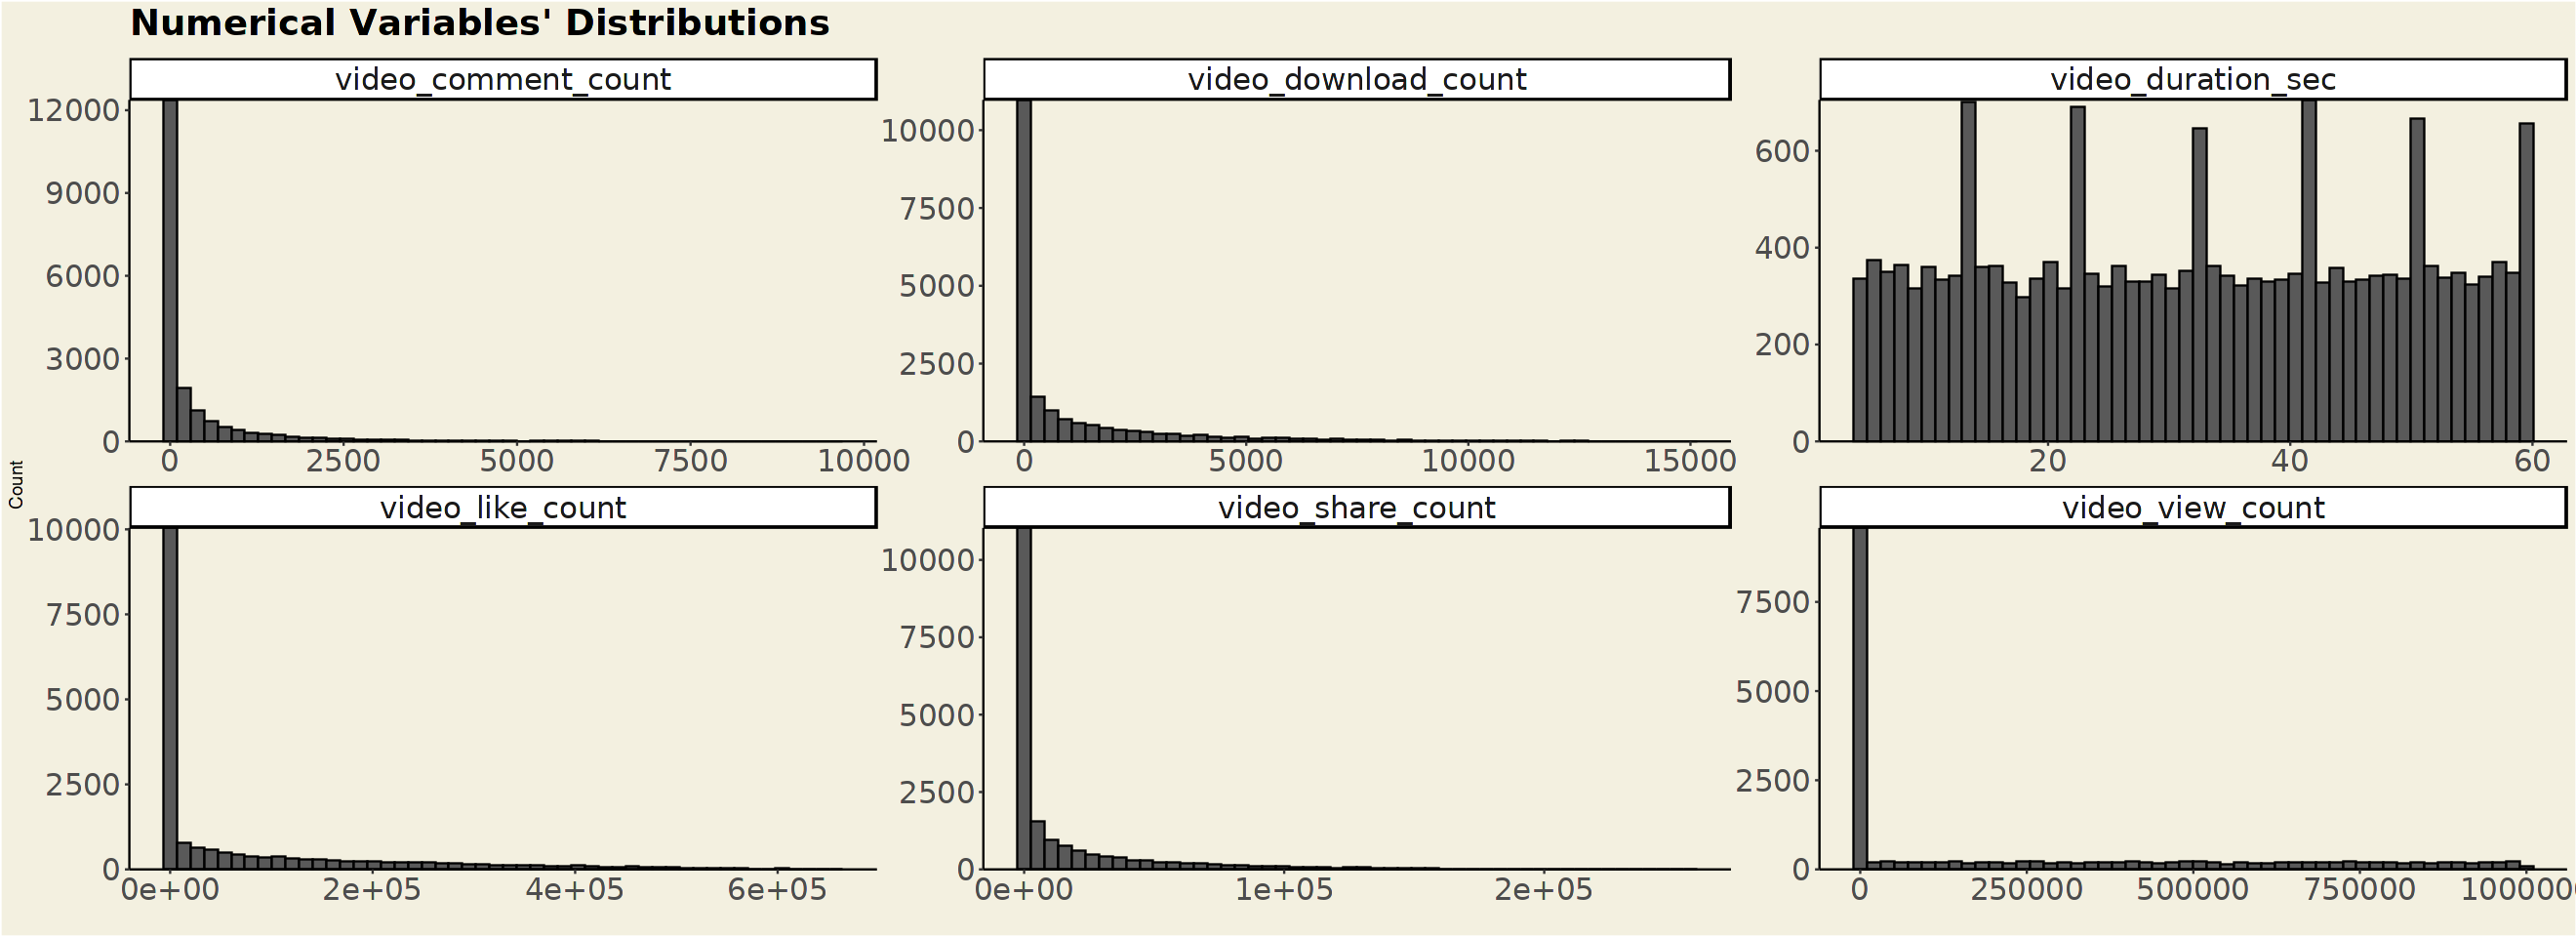

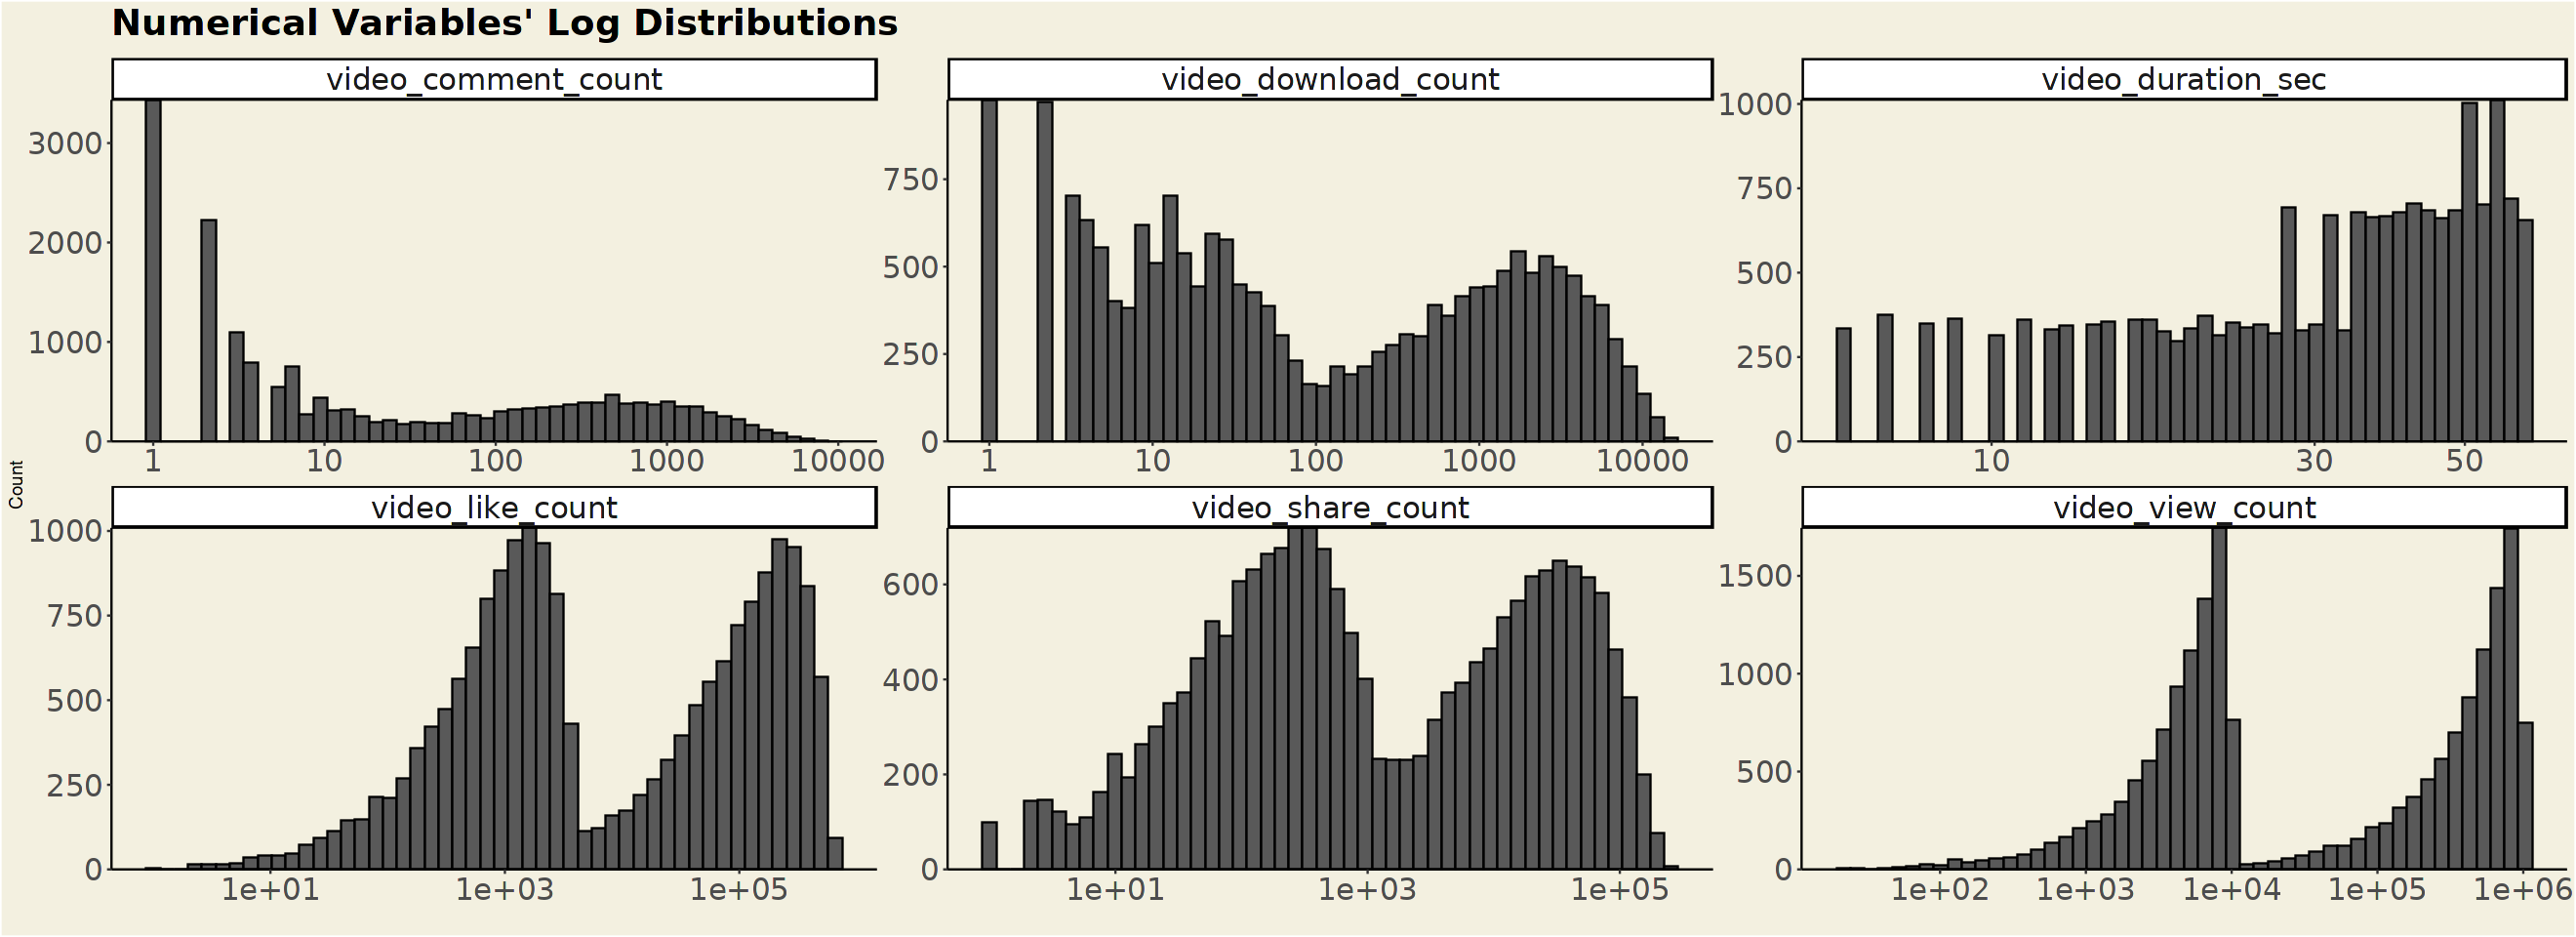

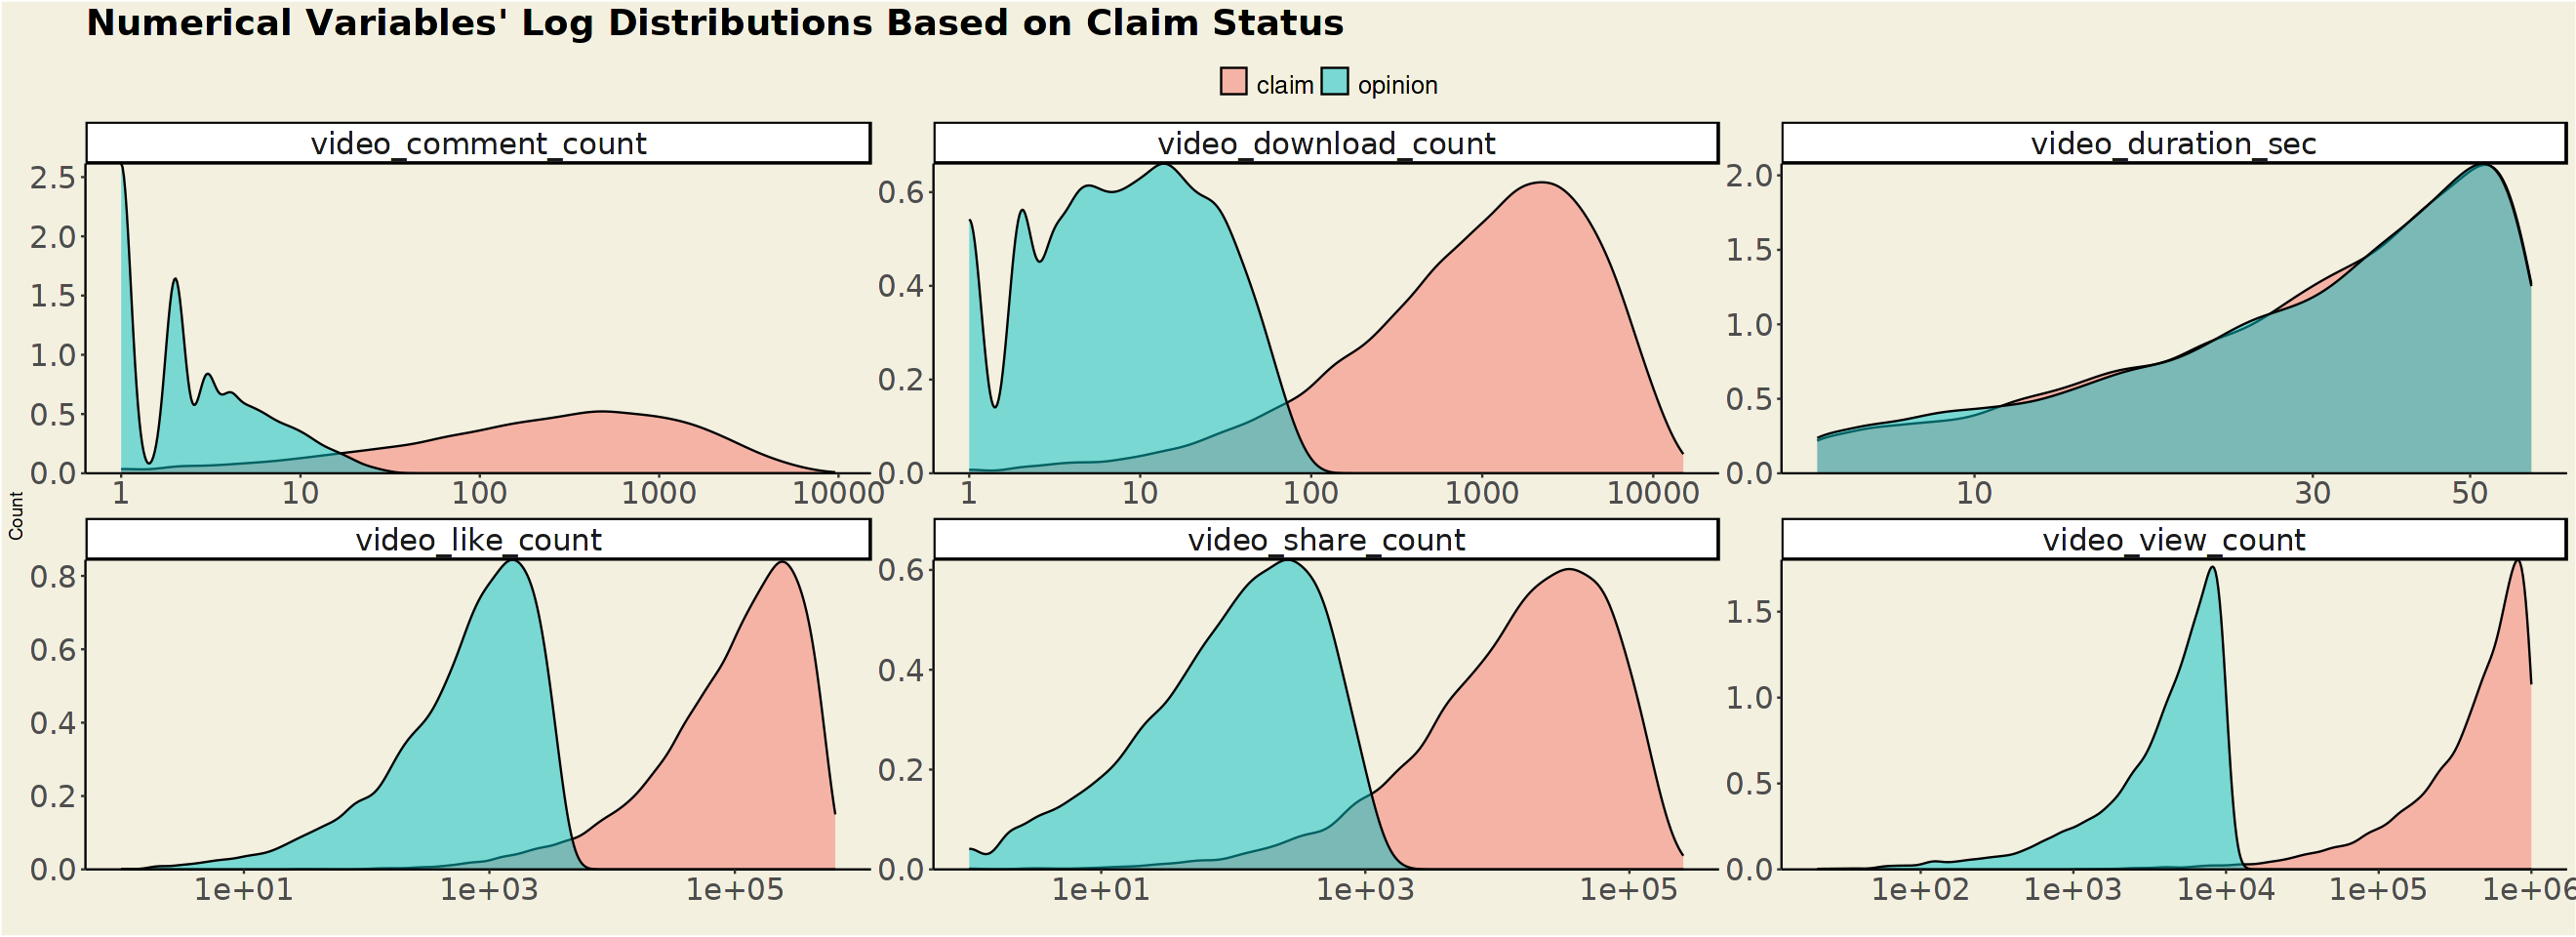

In [9]:
long_numDF <- 
    data %>%
    select(where(is.numeric)) %>%
    select(!video_id) %>%
    pivot_longer(cols=1:6,
                 names_to="feature",
                 values_to="value") 

long_numDF %>%
    ggplot(aes(x=value)) +
    geom_histogram(bins=50, colour="black") +
    facet_wrap(~feature, scales="free") +
    labs(title="Numerical Variables' Distributions",
         x="",
         y="Count") +
    theme_custom +
    theme(panel.grid.major.y = element_blank(),
          strip.text = element_text(size=18, family="Econ Sans Cnd light")
         ) +
    scale_y_continuous(expand=c(0,0))

long_numDF %>%
    ggplot(aes(x=value+1)) +
    geom_histogram(bins=50, colour="black") +
    facet_wrap(~feature, scales="free") +
    labs(title="Numerical Variables' Log Distributions",
         x="",
         y="Count") +
    theme_custom +
    theme(panel.grid.major.y = element_blank(),
          strip.text = element_text(size=18, family="Econ Sans Cnd light")
         ) +
    scale_x_log10() +
    scale_y_continuous(expand=c(0,0))


features <- 
    data %>%
    select(where(is.numeric)) %>%
    select(!video_id) %>%
    names()
features[7] <- "claim_status"
data %>%
    select(all_of(features)) %>%
    pivot_longer(cols=1:6,
                 names_to="feature",
                 values_to="value") %>%
    mutate(claim_status = factor(claim_status)) %>%
    ggplot(aes(x=value+1, fill=claim_status)) +
    geom_density(colour="black", alpha=.5) +
    facet_wrap(~feature, scales="free") +
    labs(title="Numerical Variables' Log Distributions Based on Claim Status",
         x="",
         y="Count") +
    theme_custom +
    theme(panel.grid.major.y = element_blank(),
          strip.text = element_text(size=18, family="Econ Sans Cnd light")
         ) +
    scale_x_log10() +
    scale_y_continuous(expand=c(0,0))

In [10]:
### Most statements are not from verified accounts!
data %>%
    group_by(claim_status, verified_status) %>%
    summarise("count"=n())

`summarise()` has grouped output by 'claim_status'. You can override using the
`.groups` argument.


claim_status,verified_status,count
<chr>,<chr>,<int>
claim,not verified,9399
claim,verified,209
opinion,not verified,8485
opinion,verified,991


In [11]:
claim_ban_status <- 
    data %>%
    group_by(claim_status, author_ban_status) %>%
    summarise("count"=n()) %>%
    mutate("prop"=count/sum(count))

claim_ban_status

`summarise()` has grouped output by 'claim_status'. You can override using the
`.groups` argument.


claim_status,author_ban_status,count,prop
<chr>,<chr>,<int>,<dbl>
claim,active,6566,0.68338884
claim,banned,1439,0.14977102
claim,under review,1603,0.16684013
opinion,active,8817,0.93045589
opinion,banned,196,0.02068383
opinion,under review,463,0.04886028


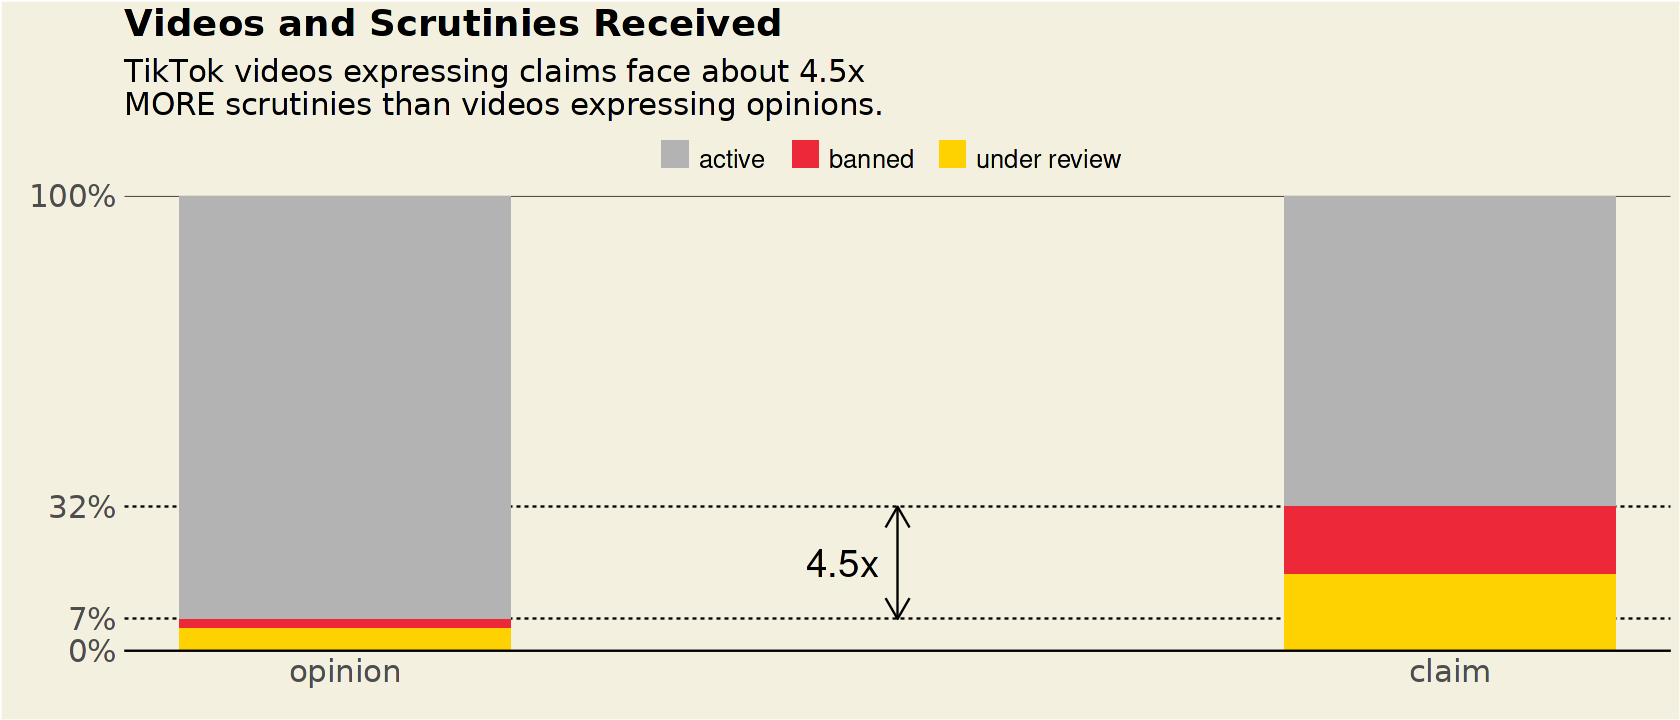

In [12]:
subtitle <- "TikTok videos expressing claims face about 4.5x  
MORE scrutinies than videos expressing opinions."

fig_size(14,6)

stacked_densities <- 
    claim_ban_status %>%
    mutate(author_ban_status = case_when(author_ban_status=="active"~"active   ",
                                         author_ban_status=="banned"~"banned   ",
                                         author_ban_status=="under review"~"under review   "
                                         )
          ) %>%
    mutate(claim_status = factor(claim_status, levels=c("opinion", "claim"))) %>%
    ## graph begins
    ggplot(aes(x=claim_status, y=prop, fill=author_ban_status)) +
    geom_hline(yintercept=1) +
    geom_hline(yintercept=c(0.07, 0.3167),
               linetype="dashed"
              ) +
    geom_bar(stat="identity", width=.3) +
    labs(title="Videos and Scrutinies Received",
         subtitle=subtitle,
         x="",
         y=""
        ) +
    theme_custom +
    theme(axis.line.y = element_blank(),
          axis.ticks.y = element_blank(),
          axis.ticks.x = element_blank(),
          panel.grid.major.y = element_blank()
         ) +
    scale_y_continuous(expand=c(0,0),
                       breaks=c(0, 0.07, 0.3167, 1), 
                       labels=c("0%", "7%", "32%", "100%")) +
    scale_x_discrete(expand=c(.2,0)) +
    scale_fill_manual(values=
                        c("active   "="grey70",
                          "banned   "="#ED2939",
                          "under review   "="#FED100"))


stacked_densities <- 
    stacked_densities +
    annotate("text", label="4.5x", 
             x=1.5-.05, 
             y=(0.3167+0.07)/2,
             size=8
            ) +
    annotate("segment",
             x = 1.5, xend = 1.5, 
             y = 0.07, yend = 0.3167, 
             arrow = arrow(ends = "both", length = unit(0.2, "inches")),
             color = "black"
            )

stacked_densities

# Conclusion 

### Betwen Claims and Opinions, very clear separations exist in numerical distributions: 

1. Videos which express claims tend to have larger values and more distinct separations for **comments, downloads, likes, shares**, and **views**
2. Of all **banned accounts and accounts under review**, there are more users which make claims than opinions

#### Videos making claims are more popular amongst viewers AND in respect of circulation, but face GREATER scrutinies than videos expressing opinions by about 4.5X